In [1]:
### Problem Statement: To predict the amount of taxiride

In [2]:
### Step1: Import Libaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("TaxiFare (3).csv")
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [5]:
df.shape

(50000, 8)

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
df.sample()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
15866,54:00.0,4.5,2011-01-03 21:54:00 UTC,-73.962023,40.767798,-73.952478,40.769978,1


In [8]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [11]:
duplicate=df.duplicated()
duplicate.sum()

0

<Axes: xlabel='amount', ylabel='count'>

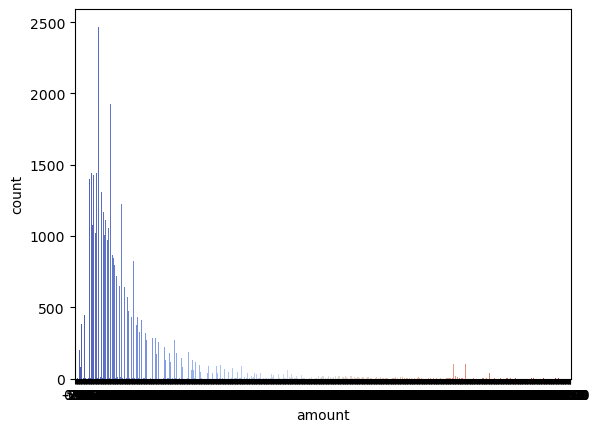

In [12]:
sns.countplot(x="amount",data=df,palette="coolwarm")

In [13]:
df["amount"].value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
26.60       1
25.39       1
55.83       1
30.04       1
27.05       1
Name: amount, Length: 703, dtype: int64

<Axes: xlabel='amount', ylabel='count'>

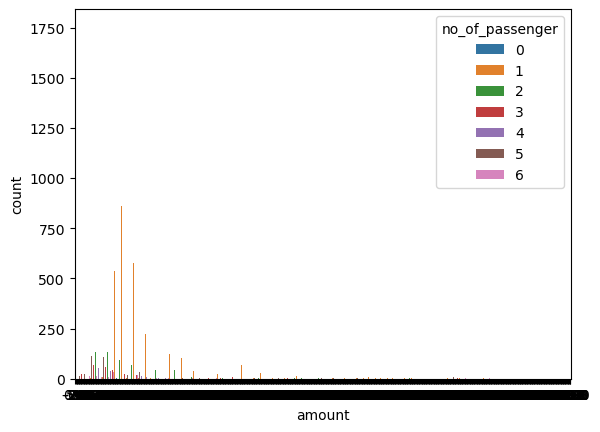

In [14]:
sns.countplot(x="amount",hue="no_of_passenger",data=df)

In [15]:
corr=df.corr()
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


<Axes: >

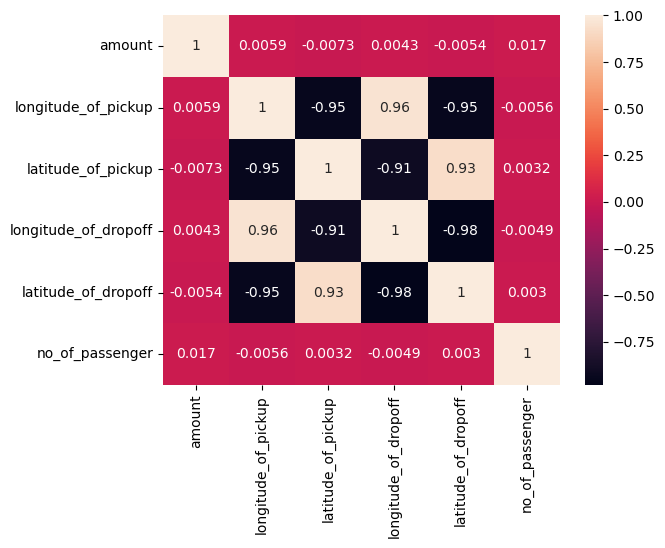

In [16]:
sns.heatmap(corr,annot=True)

<Axes: >

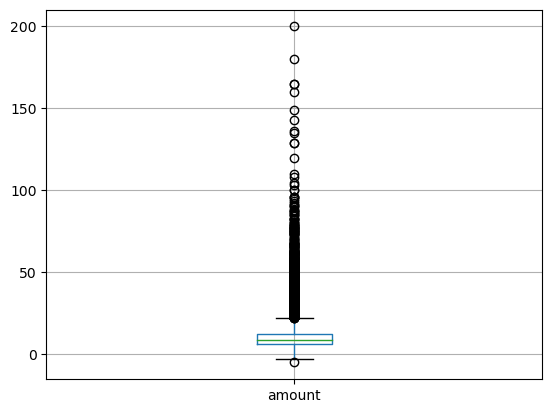

In [17]:
df.boxplot(column="amount")

In [18]:
def remove_outlier(col):  ### to remove outliers
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [19]:
low,upp=remove_outlier(df["amount"])
df["amount"]=np.where(df["amount"]>upp,upp,df["amount"])
df["amount"]=np.where(df["amount"]<low,low,df["amount"])

<Axes: >

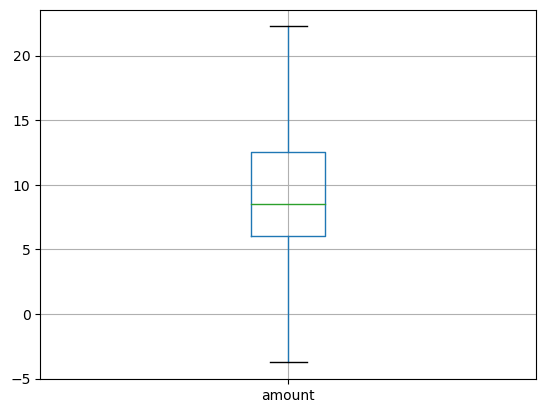

In [20]:
df.boxplot(column="amount")

In [21]:
df=df.drop(columns=["unique_id","date_time_of_pickup"],axis=1)

In [22]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [23]:
df=df.drop("longitude_of_dropoff",axis=1)

In [24]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,40.712278,1
1,16.9,-74.016048,40.711303,40.782004,1
2,5.7,-73.982738,40.761270,40.750562,2
3,7.7,-73.987130,40.733143,40.758092,1
4,5.3,-73.968095,40.768008,40.783762,1


In [25]:
df=df.drop("longitude_of_pickup",axis=1)

In [26]:
df.head()

,amount,latitude_of_pickup,latitude_of_dropoff,no_of_passenger
0,4.5,40.721319,40.712278,1
1,16.9,40.711303,40.782004,1
2,5.7,40.761270,40.750562,2
3,7.7,40.733143,40.758092,1
4,5.3,40.768008,40.783762,1


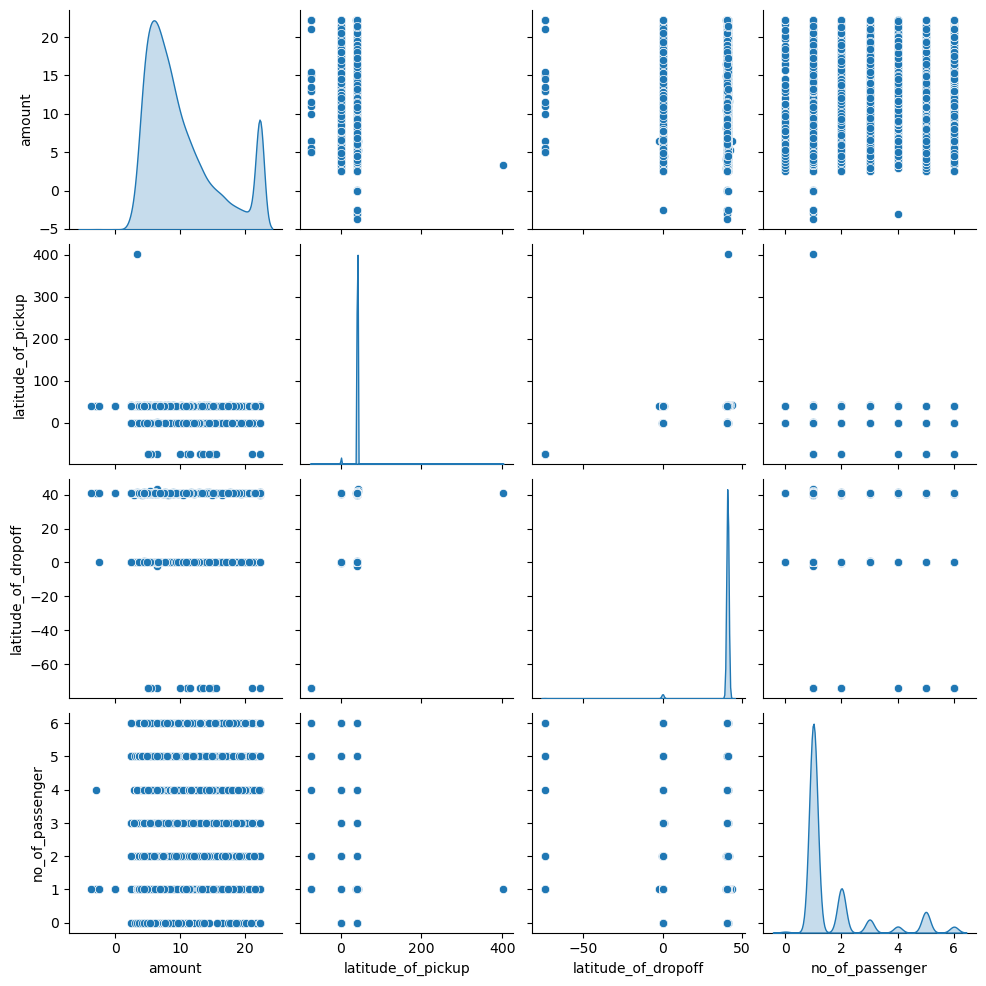

In [27]:
sns.pairplot(df,diag_kind='kde')

In [28]:
x=df.drop("amount",axis=1)
y=df["amount"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [30]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [31]:
model_1.score(x_train,y_train)

0.00035608293661626433

In [32]:
model_1.score(x_test,y_test)

0.0005818303942417558

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
model_2=DecisionTreeRegressor()
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
model_2.score(x_train,y_train)

0.9802123027212327

In [36]:
model_2.score(x_test,y_test)

0.12693258917262662

In [37]:
from sklearn.ensemble import AdaBoostRegressor

In [38]:
model_3=AdaBoostRegressor()
model_3.fit(x_train,y_train)

AdaBoostRegressor()

In [39]:
model_3.score(x_train,y_train)

0.06635980967182642

In [40]:
model_3.score(x_test,y_test)

0.06223902350882926

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
model_4=GradientBoostingRegressor()
model_4.fit(x_train,y_train)

GradientBoostingRegressor()

In [43]:
model_4.score(x_train,y_train)

0.5146484238653845

In [44]:
model_4.score(x_test,y_test)

0.516899311290937

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
model_5=RandomForestRegressor()
model_5.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
model_5.score(x_train,y_train)

0.9120685951587433

In [48]:
model_5.score(x_test,y_test)

0.504300700932403

<Axes: xlabel='amount'>

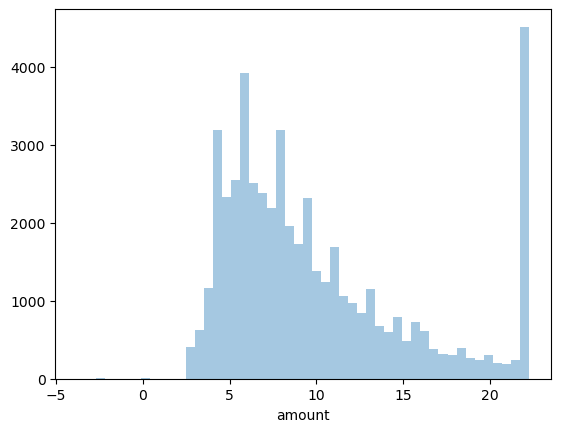

In [49]:
sns.distplot(df["amount"],kde=False)  ### Visulization part

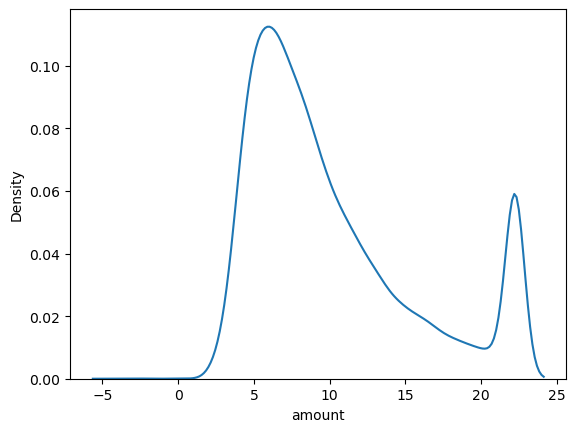

In [50]:
sns.distplot(df["amount"],hist=False)
plt.show()

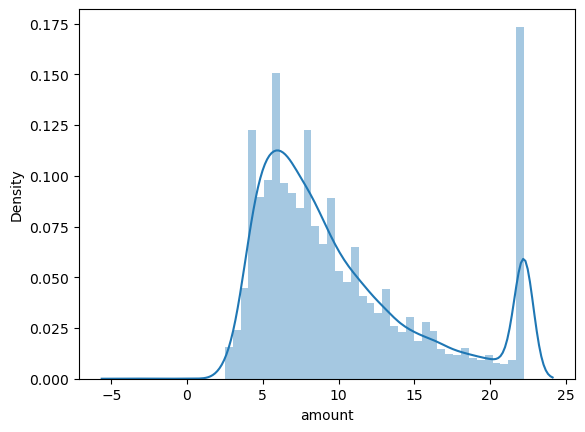

In [51]:
sns.distplot(df["amount"])
plt.show()